In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


# Load training data
train_df = pd.read_csv("../training_data.csv")

# Load testing data
test_df = pd.read_csv("../target.csv")

# Preprocess training data
train_texts = train_df['content'].tolist()
train_titles = train_df['title'].tolist()
train_labels_narrative = train_df['narrative'].apply(lambda x: x.split(';')).tolist()
train_labels_subnarrative = train_df['subnarrative'].apply(lambda x: x.split(';')).tolist()
train_languages = train_df['language'].tolist()

# Preprocess testing data
test_texts = test_df['content'].tolist()
test_titles = test_df['title'].tolist()
test_labels_narrative = test_df['narrative'].apply(lambda x: x.split(';')).tolist()
test_labels_subnarrative = test_df['subnarrative'].apply(lambda x: x.split(';')).tolist()
test_languages = test_df['language'].tolist()

# Vectorize texts
vectorizer = CountVectorizer(max_df=0.75, min_df=1, ngram_range=(1, 2))
X_train = vectorizer.fit_transform(train_texts)
X_test = vectorizer.transform(test_texts)

# Binarize labels
mlb_narrative = MultiLabelBinarizer()
y_train_narrative = mlb_narrative.fit_transform(train_labels_narrative)
y_test_narrative = mlb_narrative.transform(test_labels_narrative)

mlb_subnarrative = MultiLabelBinarizer()
y_train_subnarrative = mlb_subnarrative.fit_transform(train_labels_subnarrative)
y_test_subnarrative = mlb_subnarrative.transform(test_labels_subnarrative)

# Encode languages
le = LabelEncoder()
y_train_lang = le.fit_transform(train_languages)
y_test_lang = le.transform(test_languages)

# Train Naive Bayes classifier for language
nb_lang = MultinomialNB(alpha=1.5, fit_prior=True)
nb_lang.fit(X_train, y_train_lang)

# Train Naive Bayes classifier for narrative labels
nb_narrative = OneVsRestClassifier(MultinomialNB(alpha=1.5, fit_prior=True))
nb_narrative.fit(X_train, y_train_narrative)

# Train Naive Bayes classifier for subnarrative labels
nb_subnarrative = OneVsRestClassifier(MultinomialNB(alpha=1.5, fit_prior=True))
nb_subnarrative.fit(X_train, y_train_subnarrative)

# Predict on testing data
pred_lang = nb_lang.predict(X_test)
pred_narrative = nb_narrative.predict(X_test)
pred_subnarrative = nb_subnarrative.predict(X_test)

# Convert predictions back to label format
pred_labels_lang = le.inverse_transform(pred_lang)
pred_labels_narrative = mlb_narrative.inverse_transform(pred_narrative)
pred_labels_subnarrative = mlb_subnarrative.inverse_transform(pred_subnarrative)


c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) ['CC: Climate change is beneficial: Other', 'CC: Climate change is beneficial: Temperature increase is beneficial', 'CC: Downplaying climate change: Sea levels are not rising', 'CC: Downplaying climate change: Temperature increase does not have significant impact', 'CC: Downplaying climate change: Weather suggests the trend is global cooling', 'CC: Green policies are geopolitical instruments: Climate-related international relations are abusive/exploitative', 'CC: Questioning the measurements and science: Data shows no temperature increase', 'URW: Discrediting Ukraine: Discrediting Ukrainian nation and society', 'URW: Discrediting Ukraine: Rewriting Ukraine’s history'] will be ignored
  warnings.warn(


Language Classification Report:
              precision    recall  f1-score   support

          en       1.00      1.00      1.00       399
          pt       1.00      1.00      1.00       400

    accuracy                           1.00       799
   macro avg       1.00      1.00      1.00       799
weighted avg       1.00      1.00      1.00       799

Narrative Classification Report:
                                                        precision    recall  f1-score   support

                          CC: Amplifying Climate Fears       0.84      0.86      0.85       125
                      CC: Climate change is beneficial       1.00      0.29      0.44         7
              CC: Controversy about green technologies       1.00      0.30      0.47        23
                     CC: Criticism of climate movement       1.00      0.40      0.57        55
                     CC: Criticism of climate policies       1.00      0.41      0.58        66
         CC: Criticism of insti

c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\elfir\anaconda3\envs\nlp\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


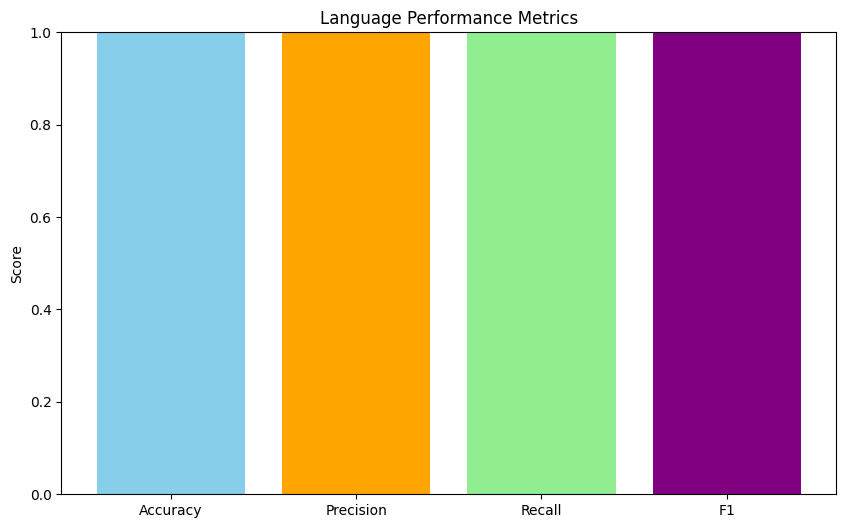

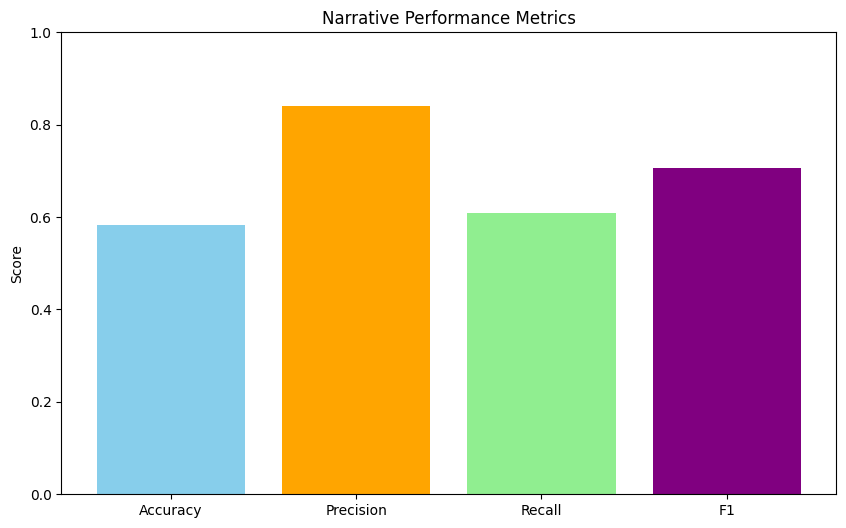

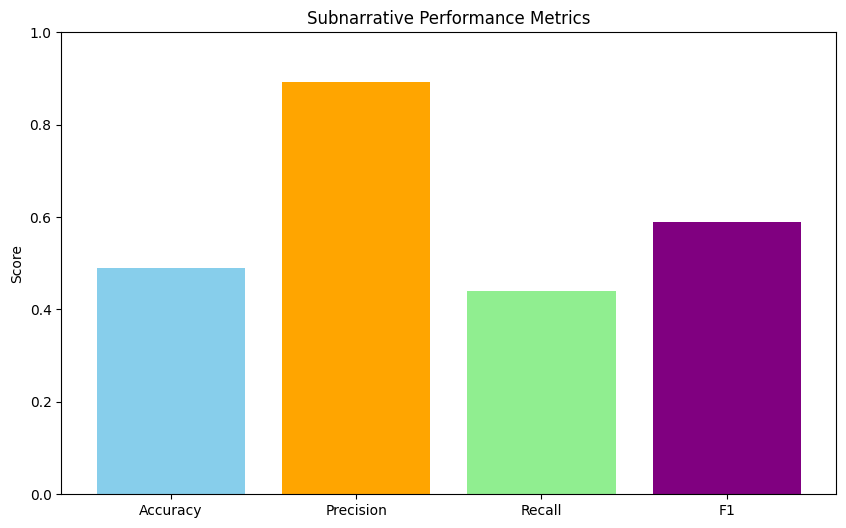

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Evaluate the model
print("Language Classification Report:")
print(classification_report(y_test_lang, pred_lang, target_names=le.classes_))

print("Narrative Classification Report:")
print(classification_report(y_test_narrative, pred_narrative, target_names=mlb_narrative.classes_))

print("Subnarrative Classification Report:")
print(classification_report(y_test_subnarrative, pred_subnarrative, target_names=mlb_subnarrative.classes_))

def calculate_metrics(y_true, y_pred, average_method="micro"):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average=average_method, zero_division=0)
    recall = recall_score(y_true, y_pred, average=average_method, zero_division=0)
    f1 = f1_score(y_true, y_pred, average=average_method, zero_division=0)
    return accuracy, precision, recall, f1

def plot_metrics_comparison(language_metrics, narrative_metrics, subnarrative_metrics):
    categories = ['Accuracy', 'Precision', 'Recall', 'F1']
    x = range(len(categories))

    data = {
        'Language': language_metrics,
        'Narrative': narrative_metrics,
        'Subnarrative': subnarrative_metrics
    }

    for key, metrics in data.items():
        plt.figure(figsize=(10, 6))
        plt.bar(x, metrics, color=['skyblue', 'orange', 'lightgreen', 'purple'])
        plt.xticks(x, categories)
        plt.ylim(0, 1)
        plt.title(f'{key} Performance Metrics')
        plt.ylabel('Score')
        plt.show()

# Calculate metrics for each task
lang_metrics = calculate_metrics(y_test_lang, pred_lang, average_method="macro")
narrative_metrics = calculate_metrics(y_test_narrative, pred_narrative, average_method="micro")
subnarrative_metrics = calculate_metrics(y_test_subnarrative, pred_subnarrative, average_method="micro")

# Print metrics
print(f"Language Metrics (Accuracy, Precision, Recall, F1): {lang_metrics}")
print(f"Narrative Metrics (Accuracy, Precision, Recall, F1): {narrative_metrics}")
print(f"Subnarrative Metrics (Accuracy, Precision, Recall, F1): {subnarrative_metrics}")

# Plot metrics comparison
plot_metrics_comparison(lang_metrics, narrative_metrics, subnarrative_metrics)

# # Confusion matrix for language classification
# cm_lang = confusion_matrix(y_test_lang, pred_lang)
# sns.heatmap(cm_lang, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix for Language Classification')
# plt.show()

# # Confusion matrix for narrative classification
# cm_narrative = confusion_matrix(y_test_narrative.argmax(axis=1), pred_narrative.argmax(axis=1))
# sns.heatmap(cm_narrative, annot=True, fmt='d', cmap='Blues', xticklabels=mlb_narrative.classes_, yticklabels=mlb_narrative.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix for Narrative Classification')
# plt.show()

# # Confusion matrix for subnarrative classification
# cm_subnarrative = confusion_matrix(y_test_subnarrative.argmax(axis=1), pred_subnarrative.argmax(axis=1))
# sns.heatmap(cm_subnarrative, annot=True, fmt='d', cmap='Blues', xticklabels=mlb_subnarrative.classes_, yticklabels=mlb_subnarrative.classes_)
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix for Subnarrative Classification')
# plt.show()